In [1]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re
from nltk.corpus import stopwords
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
data = pd.read_csv("/content/flipkart_reviews.csv")
data.head(10)

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
5,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
6,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
7,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
8,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Amazing product,5
9,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Good for normal work , students, online classe...",3


In [3]:
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [4]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

In [5]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [6]:
figure = px.pie(data, values=quantity, names=numbers,hole = 0.5)
figure.show()

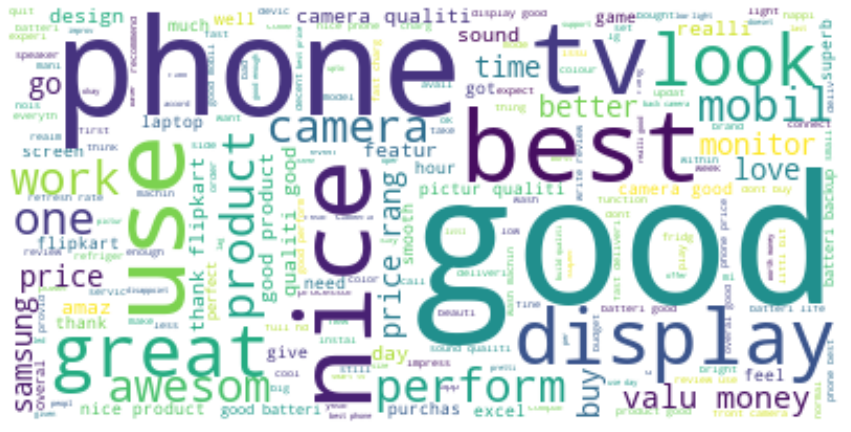

In [7]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
data.head(10)

,Review,Positive,Negative,Neutral
0,Best under 60k Great performanceI got it for a...,0.314,0.073,0.613
1,Good perfomence...,0.744,0.000,0.256
2,Great performance but usually it has also that...,0.119,0.000,0.881
3,My wife is so happy and best product 👌🏻😘,0.568,0.000,0.432
4,"Light weight laptop with new amazing features,...",0.467,0.000,0.533
5,"Amazing laptop, am so much happy, thanks for F...",0.646,0.000,0.354
6,Over all a good laptop for personal use,0.326,0.000,0.674
7,Thank you so much Flipkart,0.385,0.000,0.615
8,Amazing product,0.792,0.000,0.208
9,"Good for normal work , students, online classe...",0.188,0.000,0.812


In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006
